In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime

#한글깨짐
plt.rcParams['font.family']
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = 'C:/Windows/Fonts/malgun.ttf').get_name()
plt.rc('font', family = font_name)
plt.rcParams['axes.unicode_minus'] = False

df1 = pd.read_csv('../3.홍홍홍_데이터 및 모델 세이브 파일/dataset/LPOINT_BIG_COMP/LPOINT_BIG_COMP_01_DEMO.csv')
df2 = pd.read_csv('../3.홍홍홍_데이터 및 모델 세이브 파일/dataset/LPOINT_BIG_COMP/LPOINT_BIG_COMP_02_PDDE.csv')
df3 = pd.read_csv('../3.홍홍홍_데이터 및 모델 세이브 파일/dataset/LPOINT_BIG_COMP/LPOINT_BIG_COMP_03_COP_U.csv')
df4 = pd.read_csv('../3.홍홍홍_데이터 및 모델 세이브 파일/dataset/LPOINT_BIG_COMP/LPOINT_BIG_COMP_04_PD_CLAC.csv')
df5 = pd.read_csv('../3.홍홍홍_데이터 및 모델 세이브 파일/dataset/LPOINT_BIG_COMP/LPOINT_BIG_COMP_05_BR.csv')
df6 = pd.read_csv('../3.홍홍홍_데이터 및 모델 세이브 파일/dataset/LPOINT_BIG_COMP/LPOINT_BIG_COMP_06_LPAY.csv')

C:\Users\LG\AppData\Local\Temp\ipykernel_44192\3290867631.py:16: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('C:/jupyter_home/data/lotte/LPOINT_BIG_COMP_02_PDDE.csv')


## 온.오프라인 결제 비율

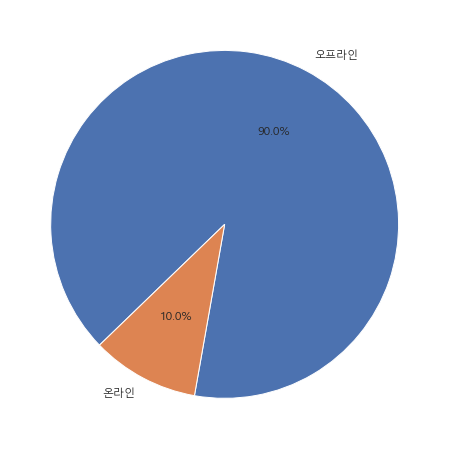

In [23]:
import matplotlib.pyplot as plt

new_2_3 = pd.concat([df2,df3])
# display(new_2_3)

off_line= new_2_3[new_2_3['chnl_dv']== 1].count()[0]
on_line = new_2_3[new_2_3['chnl_dv']== 2].count()[0]

ratio = [off_line, on_line]
labels = ['오프라인', '온라인']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260)
plt.show()

## 고객 남여비율

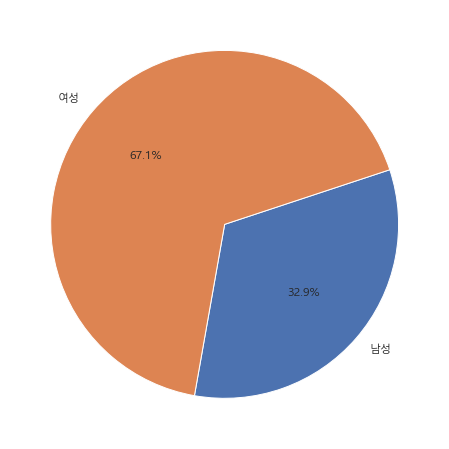

In [24]:
import matplotlib.pyplot as plt

man, female= df1[df1['ma_fem_dv']== '남성'].count()[0], df1[df1['ma_fem_dv']== '여성'].count()[0]

ratio = [man, female]
labels = ['남성', '여성']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260)
plt.show()

## 고객들 소비 시간대

<AxesSubplot:xlabel='de_hr', ylabel='count'>

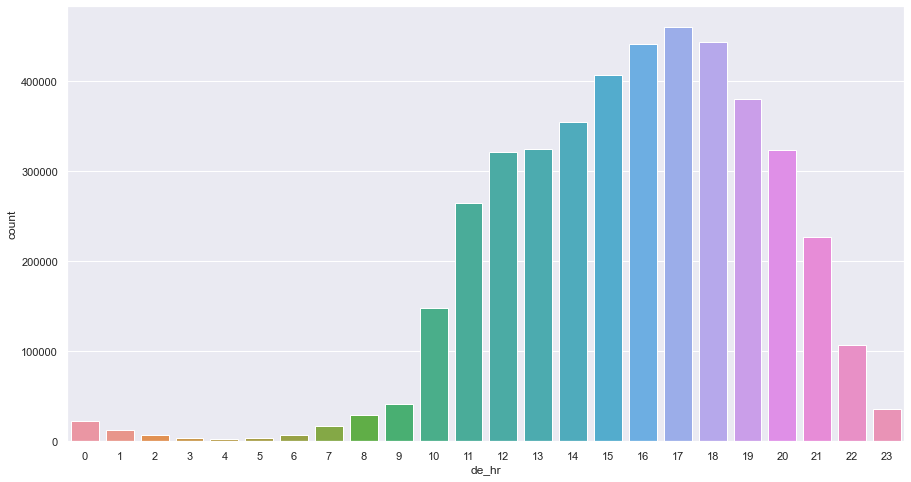

In [33]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(x='de_hr', data=df2)

<AxesSubplot:xlabel='de_hr', ylabel='count'>

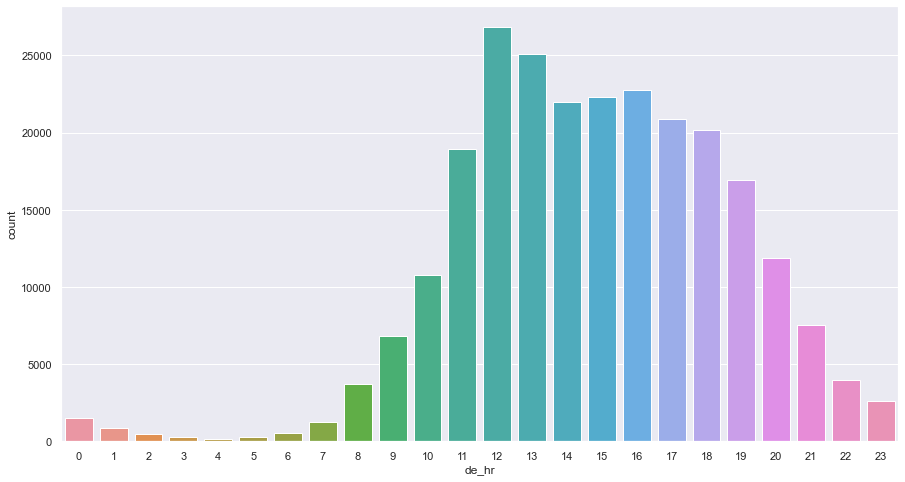

In [34]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(x='de_hr', data=df3)

## Lpay 이용자와 미이용자의 평균 구매액

In [5]:
# lpay 이용자 평균 금액
df16 = pd.merge(df1,df6, on='cust')
user_avg = pd.DataFrame(df16['ages'].value_counts())
user_avg = user_avg.reindex(index=['20대', '30대', '40대', '50대', '60대', '70대'])
user_avg['buy_am_sum'] = [df16[df16.ages=='20대']['buy_am'].sum(),
                          df16[df16.ages=='30대']['buy_am'].sum(),
                          df16[df16.ages=='40대']['buy_am'].sum(),
                          df16[df16.ages=='50대']['buy_am'].sum(),
                          df16[df16.ages=='60대']['buy_am'].sum(),
                          df16[df16.ages=='70대']['buy_am'].sum()]
user_avg['avg'] = user_avg['buy_am_sum'] / user_avg['ages']

# lpay 미이용자 평균금액
df23 = pd.concat([df2,df3])
df236 = pd.concat([df23,df6])
lpay_unuse = df236.drop_duplicates(['rct_no'], keep=False)
lpay_unuse = pd.merge(lpay_unuse,df1, on='cust')
unuse_avg = pd.DataFrame(lpay_unuse['ages'].value_counts())
unuse_avg = unuse_avg.reindex(index=['20대', '30대', '40대', '50대', '60대', '70대'])
unuse_avg['buy_am_sum'] = [lpay_unuse[lpay_unuse.ages=='20대']['buy_am'].sum(),
                          lpay_unuse[lpay_unuse.ages=='30대']['buy_am'].sum(),
                          lpay_unuse[lpay_unuse.ages=='40대']['buy_am'].sum(),
                          lpay_unuse[lpay_unuse.ages=='50대']['buy_am'].sum(),
                          lpay_unuse[lpay_unuse.ages=='60대']['buy_am'].sum(),
                          lpay_unuse[lpay_unuse.ages=='70대']['buy_am'].sum()]
unuse_avg['avg'] = unuse_avg['buy_am_sum'] / unuse_avg['ages']

Text(0.5, 1.0, 'Lpay 나이 대별 평균 구매 액수')

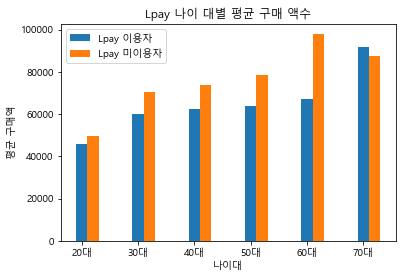

In [6]:
use = list(user_avg['avg'])
unuse = list(unuse_avg['avg'])

order = ['20대', '30대', '40대', '50대', '60대', '70대']

plt.figure()
x = np.arange(len(order))
plt.bar(x-0.0, use, label='Lpay 이용자',width=0.2)
plt.bar(x+0.2, unuse, label='Lpay 미이용자',width=0.2)
plt.xticks(x,order)
plt.legend()
plt.xlabel('나이대')
plt.ylabel('평균 구매액')
plt.title('Lpay 나이 대별 평균 구매 액수')

## 나이대별 고객 수

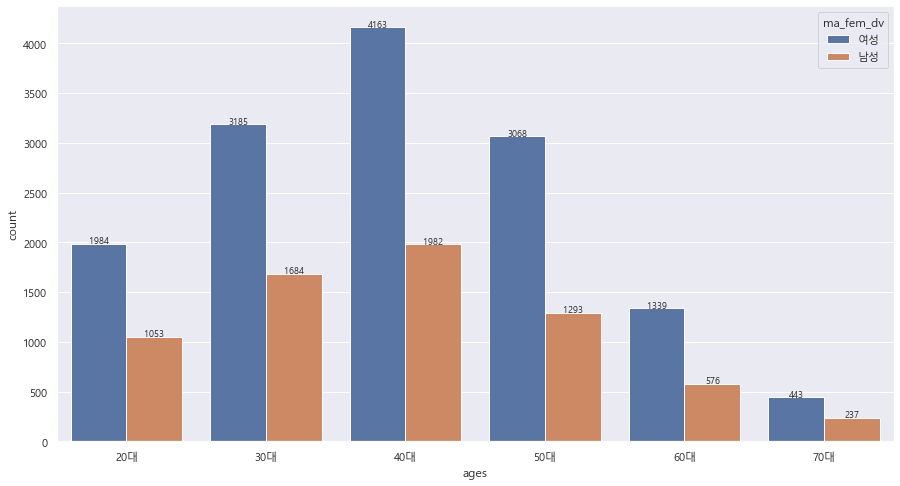

In [45]:
cust06_list = df6['cust'].tolist()

without_lpay_01 = df1[~df1['cust'].isin(cust06_list)]
order = ['20대', '30대', '40대', '50대', '60대', '70대']
ax = sns.countplot(x='ages', hue='ma_fem_dv', data=without_lpay_01, order=order)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)

## Lpay 이용률

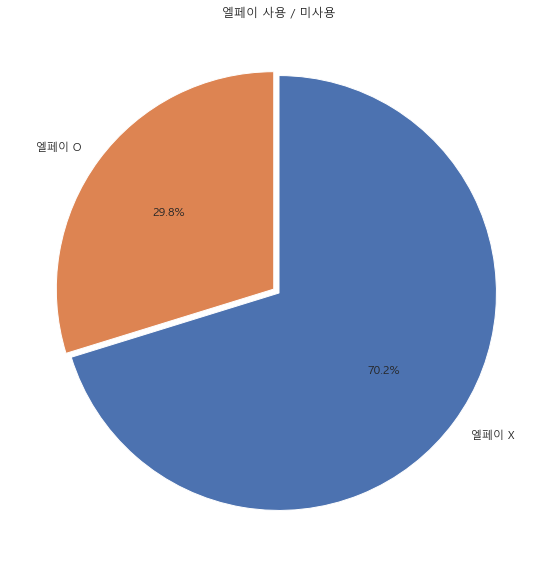

In [30]:
import pandas as pd
import matplotlib.pyplot as plt


df6 = df6[['cust']].groupby('cust', as_index=False).size()
df_outer_lpay = pd.merge(df1, df6, how='outer', on='cust')

notuse_lpay = df_outer_lpay['size'].isna().sum()
use_lpay = len(df_outer_lpay) - notuse_lpay
values = [notuse_lpay, use_lpay]
explode = [0, 0.03]

plt.figure(figsize=(10, 10))
plt.pie(values, labels=['엘페이 X', '엘페이 O'], autopct='%.1f%%', startangle=90, counterclock=False, explode=explode)
plt.title('엘페이 사용 / 미사용')
plt.show()

## 제휴사 A 연령별 구매율 (Lpay)

Text(0.5, 1.0, '제휴사 A 연령별 구매횟수 (엘페이)')

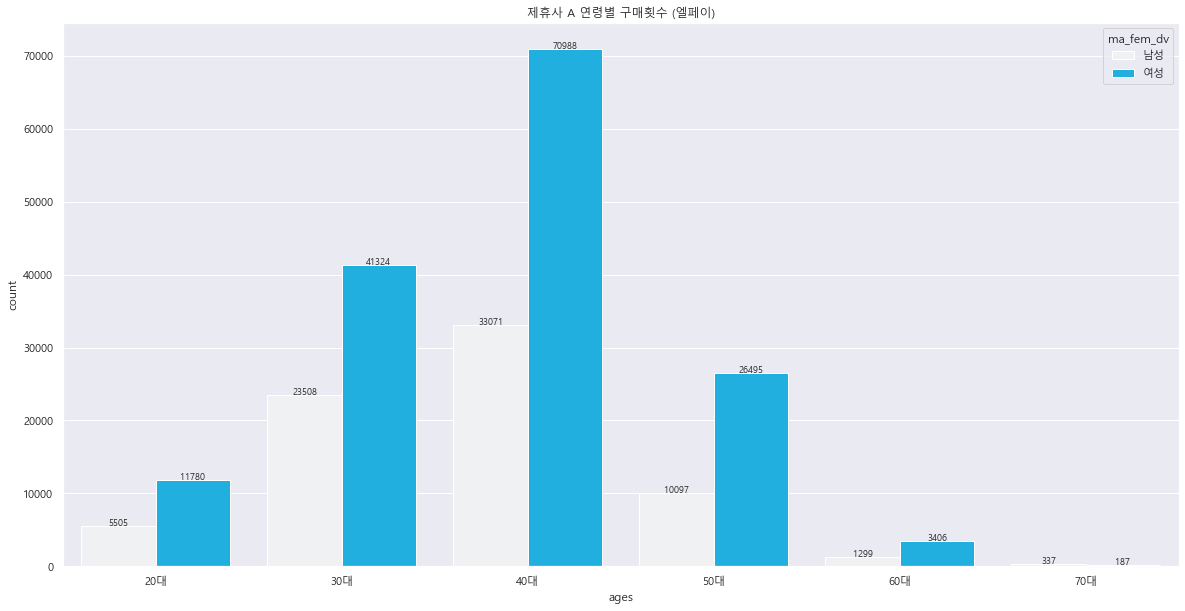

In [40]:
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'Malgun Gothic'

# df6 = df6.drop(['rct_no'], axis=1)
df_06_01 = pd.merge(df6, df1, on='cust', how='inner')

df = df_06_01[df_06_01['cop_c'].str.contains('A')]
order = ['20대', '30대', '40대', '50대', '60대', '70대']

plt.figure(figsize=(20,10))
ax = sns.countplot(x='ages', hue='ma_fem_dv', data=df, order=order, color='#00BFFF')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)

plt.title('제휴사 A 연령별 구매횟수 (엘페이)')

## Lpay 결제 제휴사 이용 현황

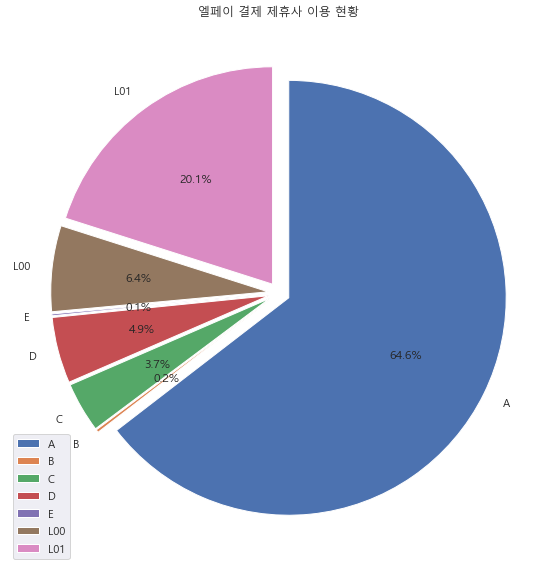

In [27]:
grp = df6.groupby('cop_c')

df_06_cop_c = df6.groupby('cop_c', as_index=False).size()
df_06_cop_c_list = df_06_cop_c['cop_c'].tolist()

values = [0] * 7

for i in df_06_cop_c_list:
    i = str(i)
    if 'A' in i:
        res = grp.size()[i]
        values[0] += res
    elif 'B' in i:
        res = grp.size()[i]
        values[1] += res
    elif 'C' in i:
        res = grp.size()[i]
        values[2] += res
    elif 'D' in i:
        res = grp.size()[i]
        values[3] += res
    elif 'E' in i:
        res = grp.size()[i]
        values[4] += res
    elif 'L00' in i:
        res = grp.size()[i]
        values[5] += res
    else:
        res = grp.size()[i]
        values[6] += res

labels = ['A', 'B', 'C', 'D', 'E', 'L00', 'L01']

plt.figure(figsize=(10, 10))
explode = [0.05] * 7

plt.title('엘페이 결제 제휴사 이용 현황')
plt.pie(values, labels=labels, autopct='%.1f%%', startangle=90, counterclock=False, explode=explode)
plt.legend()
plt.show()

## Lpay 이용자 비율

Text(0.5, 1.0, 'Lpay 이용자 비율')

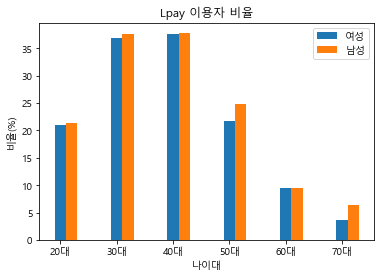

In [7]:
# 여성 lpay이용자
fe_user = pd.DataFrame(df1[df1.ma_fem_dv == '여성']['ages'].value_counts())
fe_user.rename(columns ={'ages':'total_count'},inplace=True)

df6_cust = pd.DataFrame(df6['cust'].unique(),columns=['cust'])
cust_df6 = pd.merge(df6_cust, df1, on='cust')

fe_user['user_count'] = cust_df6[cust_df6.ma_fem_dv == '여성']['ages'].value_counts()
fe_user['ratio'] = fe_user['user_count'] / fe_user['total_count'] *100
fe_user = fe_user.reindex(index=['20대', '30대', '40대', '50대', '60대', '70대'])

# 남성 lpay이용자
ma_user = pd.DataFrame(df1[df1.ma_fem_dv == '남성']['ages'].value_counts())
ma_user.rename(columns ={'ages':'total_count'},inplace=True)

df6_cust = pd.DataFrame(df6['cust'].unique(),columns=['cust'])
cust_df6 = pd.merge(df6_cust, df1, on='cust')

ma_user['user_count'] = cust_df6[cust_df6.ma_fem_dv == '남성']['ages'].value_counts()
ma_user['ratio'] = ma_user['user_count'] / ma_user['total_count'] *100
ma_user = ma_user.reindex(index=['20대', '30대', '40대', '50대', '60대', '70대'])

fe = list(fe_user['ratio'])
ma = list(ma_user['ratio'])

order = ['20대', '30대', '40대', '50대', '60대', '70대']

plt.figure()
x = np.arange(len(order))
plt.bar(x-0.0, fe, label='여성',width=0.2)
plt.bar(x+0.2, ma, label='남성',width=0.2)
plt.xticks(x,order)
plt.legend()
plt.xlabel('나이대')
plt.ylabel('비율(%)')
plt.title('Lpay 이용자 비율')